# Assignment 4

## 4.1 Using a CNN to Classify Clothes
Zalando has released a so-called plug-in replacement for the MNIST dataset. Instead of handwritten digits, the dataset consists of grayscale images showing different kinds of apparel. The dataset is built into
Keras and can be obtained using the function tf.keras.datasets.fashion_mnist.load_data().
We want to find out how well the CNN used in Chapter 4.4 works for classifying clothes.

(a) Modify the code to use the plug-in replacement dataset instead of the original MNIST dataset
and determine the accuracy on the test data.

(b) Determine for each of the ten classes the five most prototypical images. That is, you should
look for images for which the probability of belonging to the specific class is largest.

(c) Determine the images that are most confusing for the classifier. You may again use the entropy
over the class probabilities as in Assignment 3.


In [5]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# reshape and normalize the data
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

# one-hot encode the class labels (0-9)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides=(1,1), padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

Class 0: 
472
1.0
[1.0000000e+00 1.3573504e-22 1.8759527e-14 8.4856682e-14 8.6079734e-19
 2.1498343e-18 1.3539838e-11 1.4687118e-12 2.9285998e-14 2.8990401e-17]


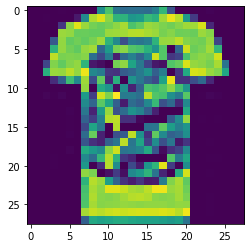

489
1.0
[1.0000000e+00 2.7214222e-25 1.7887266e-13 2.2579531e-19 1.7885695e-17
 2.5513531e-20 1.9241903e-14 2.3106978e-18 3.9708688e-14 2.7155996e-21]


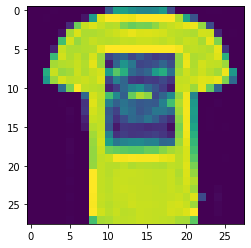

755
1.0
[1.0000000e+00 4.3989470e-15 1.4765844e-09 7.4522739e-13 2.0536290e-11
 2.0254860e-13 4.6886594e-08 1.0103486e-12 1.1918932e-11 4.4225471e-14]


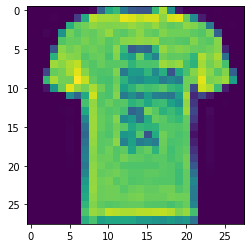

1069
1.0
[1.0000000e+00 1.4195870e-20 3.4726235e-09 9.8084034e-11 1.7046486e-16
 4.3664104e-16 1.0105222e-08 2.6597051e-13 3.2289879e-15 7.4337221e-16]


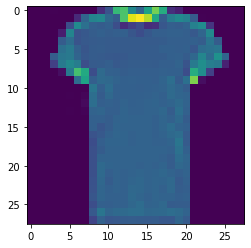

1412
1.0
[1.0000000e+00 6.0429513e-31 3.7964279e-15 9.0569936e-22 5.3159677e-23
 6.6704175e-22 9.7280501e-14 1.9084038e-22 1.5602188e-19 6.1412476e-25]


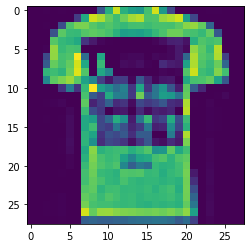

Class 1: 
2
1.0
[8.6035130e-18 1.0000000e+00 1.6389261e-23 1.3060535e-22 4.0513397e-23
 9.5885727e-27 1.8590036e-23 1.7280881e-31 7.0524676e-21 5.4310419e-30]


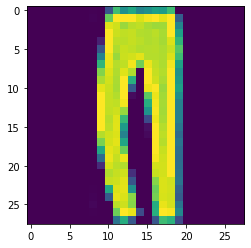

3
1.0
[1.7473770e-17 1.0000000e+00 4.4624665e-21 5.7259553e-17 2.4853530e-17
 9.4130275e-25 2.1104909e-17 1.5288281e-26 1.6242958e-20 1.0908801e-26]


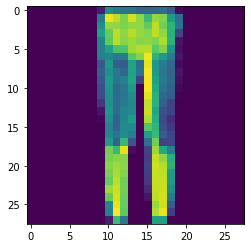

5
1.0
[3.3086720e-18 1.0000000e+00 6.7318411e-23 5.5778572e-20 1.3900003e-22
 1.7853371e-26 1.1595826e-22 3.3097031e-28 7.1892610e-21 2.5141583e-26]


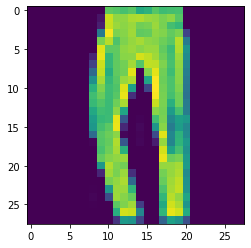

15
1.0
[2.2731318e-13 1.0000000e+00 3.0610638e-16 1.5465817e-14 2.4532327e-13
 7.4403381e-22 8.6449123e-15 4.9990166e-23 7.5470065e-18 2.5950036e-20]


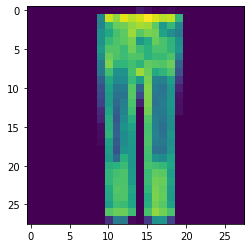

24
1.0
[8.5904404e-15 1.0000000e+00 2.2839506e-19 3.7740145e-17 7.6436907e-18
 3.4694363e-22 8.4762041e-18 1.2947364e-25 4.9139636e-19 3.7973833e-23]


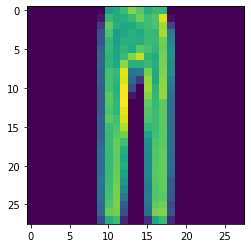

Class 2: 
110
1.0
[3.4912871e-12 1.9404129e-34 1.0000000e+00 2.7413244e-24 9.5374919e-10
 5.5237688e-23 4.6711862e-10 7.1576054e-27 2.0175202e-24 4.7312952e-23]


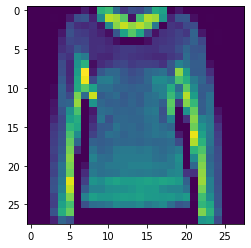

338
1.0
[2.6507980e-12 1.4544014e-25 1.0000000e+00 1.2805904e-13 9.2797020e-14
 1.9270696e-18 2.7825298e-09 2.2652002e-19 1.4396024e-18 3.3932134e-18]


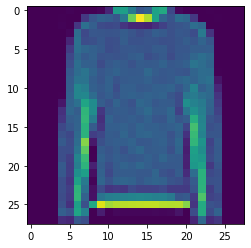

497
1.0
[2.66057310e-09 1.97393155e-22 1.00000000e+00 3.45826797e-16
 3.07762460e-09 4.66604999e-13 2.28505694e-08 1.20335845e-14
 8.22364224e-16 2.81737134e-12]


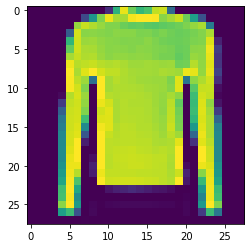

506
1.0
[5.0809579e-11 4.1034263e-17 1.0000000e+00 2.5415525e-12 1.6467621e-09
 2.9436388e-16 2.7134661e-10 4.0341143e-15 2.6409369e-12 3.4505693e-14]


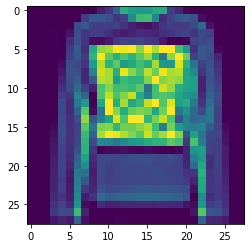

508
1.0
[6.5545818e-09 5.2612147e-23 1.0000000e+00 7.6105844e-17 1.6819126e-08
 3.3452354e-18 1.0512019e-08 2.8754401e-15 9.5178287e-14 1.1100541e-14]


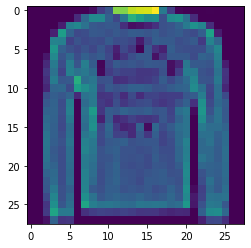

Class 3: 
100
1.0
[2.9673919e-10 8.0015536e-11 1.3420581e-12 1.0000000e+00 1.1110753e-10
 2.2620574e-11 1.6799664e-08 2.6295000e-10 3.2904221e-10 4.6804652e-12]


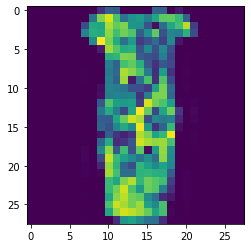

194
1.0
[1.5410275e-11 1.6471294e-09 1.4561408e-15 1.0000000e+00 1.7420795e-13
 4.5887921e-15 1.2721593e-10 7.8181353e-15 2.8032418e-12 7.6595781e-16]


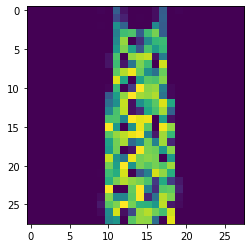

694
1.0
[2.6273180e-11 7.5868456e-13 1.7311297e-16 1.0000000e+00 1.0343009e-15
 9.6298593e-17 8.3640248e-11 8.9094108e-13 1.5839691e-16 8.3383701e-13]


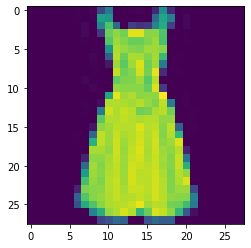

713
1.0
[3.1891760e-09 4.7241415e-13 3.5140050e-14 1.0000000e+00 5.3352687e-15
 1.7789574e-14 5.8262120e-08 1.9278593e-15 3.1435561e-16 1.2545764e-17]


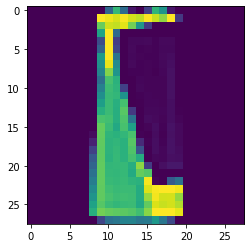

923
1.0
[6.02849015e-09 5.84579855e-17 1.26124349e-14 1.00000000e+00
 1.22891953e-14 1.07975804e-14 8.18380208e-09 2.18554723e-11
 3.03644292e-16 5.13556602e-12]


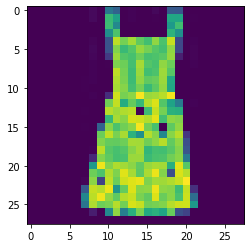

Class 4: 
3777
1.0
[9.1612383e-22 4.4222485e-23 2.8709272e-13 3.2842240e-27 1.0000000e+00
 3.2089702e-24 3.0193631e-10 2.4592635e-27 2.5042376e-22 4.6769888e-18]


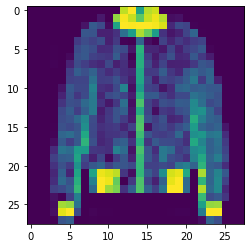

4464
1.0
[6.9494375e-28 1.9210046e-28 4.6631321e-09 5.5019354e-32 1.0000000e+00
 4.0133766e-23 6.2417180e-14 1.6966062e-29 1.0269247e-24 4.2185402e-19]


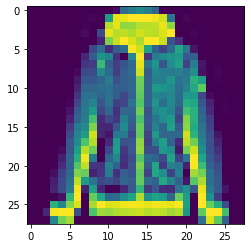

5628
1.0
[3.8407298e-20 1.5813069e-23 5.4218727e-11 8.3536640e-29 1.0000000e+00
 3.2668267e-22 7.3951860e-12 1.9527836e-27 2.1290302e-19 1.3995356e-21]


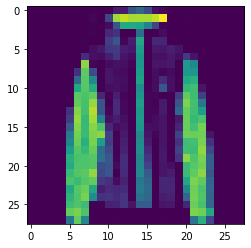

5965
1.0
[8.7406031e-17 7.8096002e-10 3.7137258e-13 2.7828849e-13 1.0000000e+00
 1.0959194e-17 5.0367612e-09 7.2693141e-22 1.2725176e-15 3.6872645e-17]


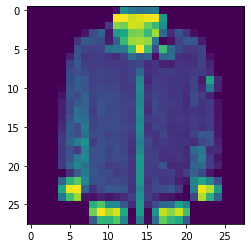

6382
1.0
[2.0322302e-10 2.3104969e-09 1.2502632e-08 1.2820249e-13 1.0000000e+00
 7.3330400e-14 2.4672167e-09 4.4916135e-16 1.7452249e-10 5.3472195e-11]


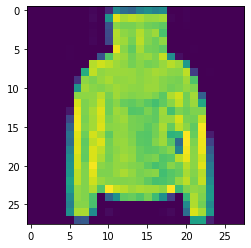

Class 5: 
8
1.0
[8.78172914e-13 1.02874656e-19 1.17738427e-16 5.22118944e-15
 8.58497638e-21 1.00000000e+00 1.77038489e-16 5.42005202e-15
 1.09076767e-11 6.34331725e-20]


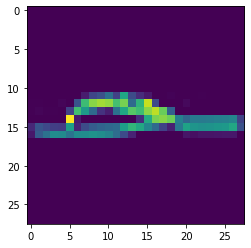

11
1.0
[2.6952752e-16 1.4732165e-21 3.2860647e-13 3.5693621e-18 2.2463042e-11
 1.0000000e+00 2.7997771e-10 1.0465259e-13 2.4113680e-10 4.6212224e-14]


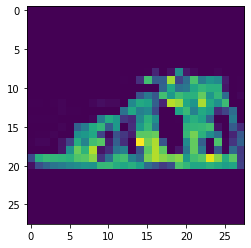

37
1.0
[3.2395325e-10 2.5274006e-14 4.5817523e-11 1.6935349e-10 3.2578877e-13
 1.0000000e+00 1.5390691e-10 9.8586792e-09 9.3838128e-09 4.8706584e-11]


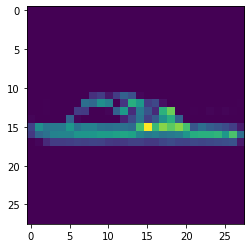

52
1.0
[1.4718628e-21 1.7708510e-31 6.5321855e-26 1.1420760e-21 2.8961293e-27
 1.0000000e+00 1.7056118e-23 1.5968609e-24 1.0117943e-17 4.5495038e-23]


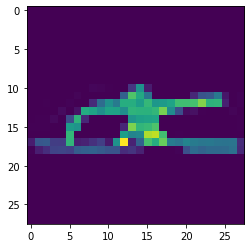

63
1.0
[2.2472132e-18 1.5120761e-28 7.7094656e-17 8.3644904e-25 4.1631949e-19
 1.0000000e+00 8.0811612e-21 1.7595214e-20 4.9562832e-12 1.1020726e-19]


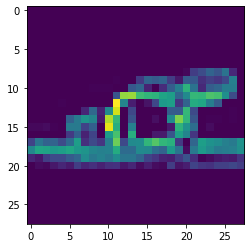

Class 6: 
1698
1.0
[4.8962618e-12 4.5038194e-28 7.3416340e-10 5.7091369e-14 2.5730695e-10
 2.3983526e-16 1.0000000e+00 6.7276512e-17 3.8244655e-16 4.2421096e-15]


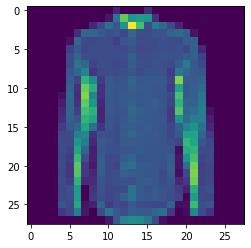

3966
1.0
[1.0394603e-12 1.5381183e-25 3.8378290e-13 6.3256426e-16 6.2334418e-09
 1.0960161e-16 1.0000000e+00 8.8053131e-20 9.4174066e-18 3.0446533e-17]


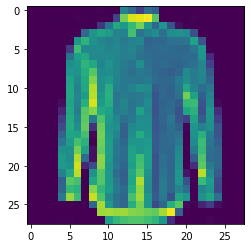

4841
1.0
[6.3646886e-11 2.4250140e-23 3.1401157e-09 3.9045988e-13 1.9269949e-08
 5.5677521e-15 1.0000000e+00 2.0580832e-15 5.4879180e-15 1.0521761e-13]


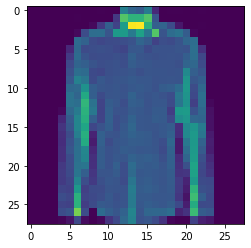

5371
1.0
[1.1021390e-13 3.6892870e-34 2.4105060e-12 2.7216514e-17 3.9404771e-11
 7.6011067e-22 1.0000000e+00 5.2973331e-27 2.7903477e-20 2.1593686e-18]


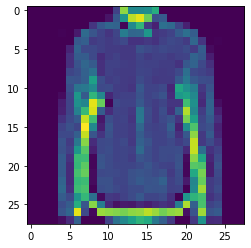

6438
1.0
[1.2605011e-09 6.0479833e-22 1.5693714e-09 8.2630135e-12 4.0144466e-09
 6.7152226e-15 1.0000000e+00 4.4249497e-15 2.6689984e-14 4.7208422e-14]


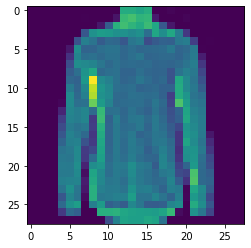

Class 7: 
9
1.0
[6.6936709e-20 9.8606748e-31 5.2598763e-21 7.3467861e-22 2.2173080e-25
 4.3310859e-19 2.3503830e-18 1.0000000e+00 4.0878410e-21 1.0494736e-18]


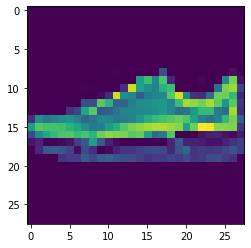

22
1.0
[4.9541715e-10 3.9248691e-14 6.8129238e-11 3.1038370e-11 4.6121171e-14
 3.3712821e-09 3.0990349e-10 1.0000000e+00 3.0952647e-11 3.0483569e-08]


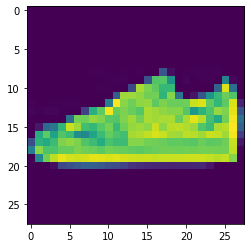

36
1.0
[1.1608510e-25 0.0000000e+00 5.7619379e-23 8.8123580e-30 3.4353541e-29
 2.2652554e-16 3.3826234e-21 1.0000000e+00 1.4465002e-25 1.8300827e-25]


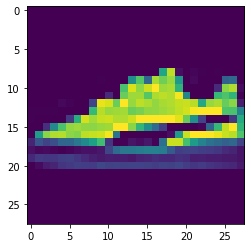

70
1.0
[2.1507227e-12 9.1725876e-18 2.3691637e-12 1.3441953e-11 6.4694601e-14
 1.1050319e-08 6.2275118e-09 1.0000000e+00 9.1148575e-11 3.0181959e-09]


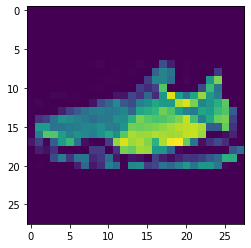

102
1.0
[8.1868106e-14 1.4902932e-20 1.1379226e-14 5.4185020e-15 3.2651513e-18
 2.4876344e-13 3.7212987e-13 1.0000000e+00 2.0537512e-14 7.2391561e-13]


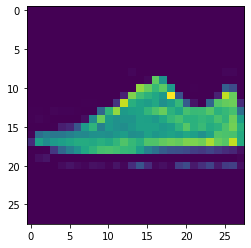

Class 8: 
30
1.0
[6.1322112e-25 0.0000000e+00 1.2219356e-29 0.0000000e+00 4.5585803e-27
 6.7706606e-28 1.5148871e-29 9.2199698e-28 1.0000000e+00 2.5160952e-27]


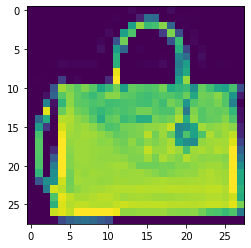

31
1.0
[1.7685268e-18 1.2381086e-30 9.8954779e-19 4.0322866e-21 1.1878069e-13
 7.4460317e-18 4.5537566e-16 3.6973578e-20 1.0000000e+00 3.8405920e-23]


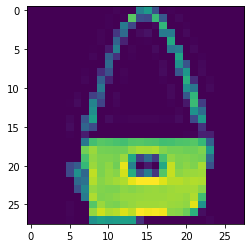

34
1.0
[4.2087624e-14 1.4310561e-32 3.4776691e-12 2.5477399e-24 2.7584337e-09
 4.2878006e-12 7.2253399e-19 1.8004422e-14 1.0000000e+00 1.7354200e-17]


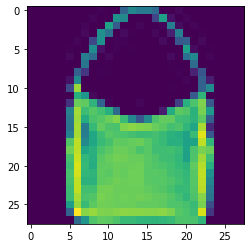

53
1.0
[2.5437437e-09 1.2856579e-22 2.1460756e-16 1.2885181e-18 1.4967234e-15
 9.3312626e-14 4.3180364e-08 4.0919545e-16 1.0000000e+00 4.1107809e-10]


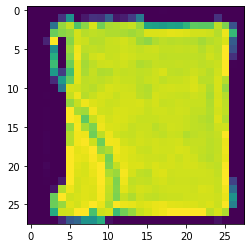

56
1.0
[4.8030734e-22 2.9978888e-37 5.2861620e-30 2.1506594e-36 2.7253096e-31
 1.5432535e-27 1.1411500e-18 2.3408671e-22 1.0000000e+00 2.3284987e-20]


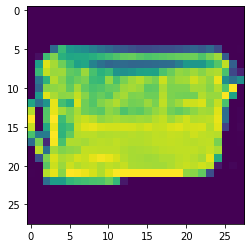

Class 9: 
0
1.0
[3.1518400e-13 1.4063458e-17 7.2922984e-14 5.8467930e-20 1.7344744e-16
 2.2378965e-11 4.6620225e-12 1.6900779e-11 8.6145643e-14 1.0000000e+00]


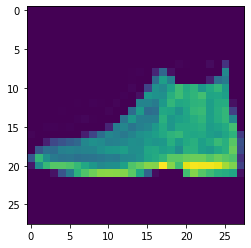

28
1.0
[2.3898036e-13 6.2573178e-15 6.2063565e-13 7.3205394e-16 2.7965769e-16
 2.1446324e-11 6.0987864e-12 4.7307847e-10 7.1791328e-14 1.0000000e+00]


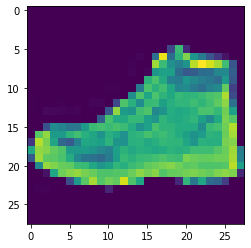

39
1.0
[1.3725864e-10 3.5129038e-15 8.7686273e-12 2.2300330e-13 5.2624006e-15
 9.9994721e-11 4.2860143e-10 1.4276030e-08 7.1494021e-13 1.0000000e+00]


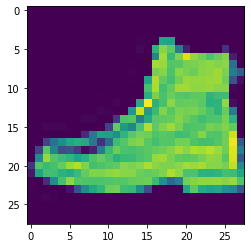

83
1.0
[3.5849278e-13 5.2720198e-17 2.0008299e-14 2.6191955e-16 1.2752570e-17
 8.2841394e-13 8.9493369e-12 1.5721149e-10 1.1041326e-15 1.0000000e+00]


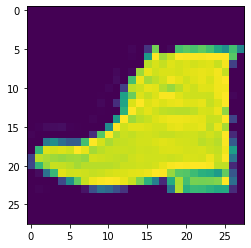

123
1.0
[2.6237244e-17 7.2699962e-25 4.7967848e-18 8.3149657e-23 5.8772915e-21
 3.5909342e-14 4.0076845e-16 1.2698542e-13 1.7540823e-17 1.0000000e+00]


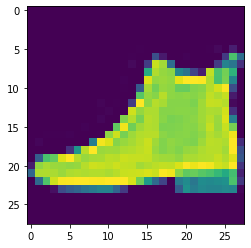

In [28]:
# compute predictions (i.e., probability distributions) on test data
Y_hat = model.predict(X_test)

import math
# define function to compute entropy
def entropy(p):
    return -sum([prob*(0.0 if prob == 0.0 else math.log2(prob)) for prob in p])

# load original MNIST data
(X_train_original, y_train_original), (X_test_original, y_test_original) = fashion_mnist.load_data()

for i in range(0,10):
  column = Y_hat[:, i]

  # sort test data points in descending order of probabilities
  indices = list(range(0, len(column)))
  indices.sort(key = lambda i : -column[i])
  
  print("Class %d: " % i)
  # show five most prototypical images
  for i in range(0, 6):
      print(indices[i])
      print(column[indices[i]])
      print(Y_hat[indices[i]])
      plt.imshow(X_test_original[indices[i]])
      plt.show()


2189
2.3627512978828715
[0.07513028 0.0180463  0.05237918 0.1535411  0.4036335  0.00090057
 0.22632307 0.00555726 0.0607754  0.00371347]


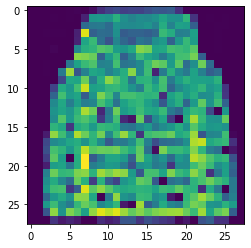

4658
2.343464781187529
[0.31515187 0.0038965  0.1277933  0.20516643 0.16443115 0.00058851
 0.17526874 0.00123503 0.0048452  0.00162326]


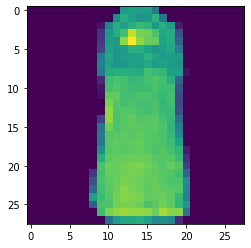

9573
2.3121480545886812
[2.3020303e-01 7.1927707e-04 1.6319175e-01 3.1636772e-01 1.1729070e-01
 2.3807374e-04 1.6254914e-01 8.3255861e-04 7.1593262e-03 1.4484368e-03]


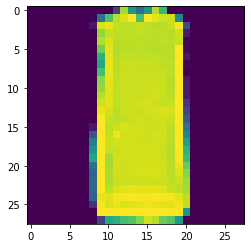

9969
2.2898129822144817
[6.80633113e-02 2.90413164e-02 4.31582844e-03 7.98968822e-02
 2.47162133e-01 1.02051745e-05 3.70180726e-01 3.05970921e-03
 1.93060324e-01 5.20948833e-03]


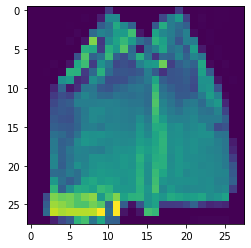

5121
2.28784751352256
[0.1664663  0.00263335 0.107365   0.4539127  0.05469747 0.00247553
 0.14818609 0.01070865 0.05056827 0.00298662]


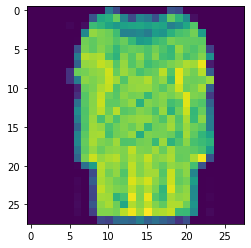

9251
2.2649733230823514
[2.3859769e-01 1.7661786e-03 6.8444200e-02 1.3138826e-01 3.3887500e-01
 2.9405867e-04 1.5854100e-02 5.3598947e-04 2.0376584e-01 4.7877550e-04]


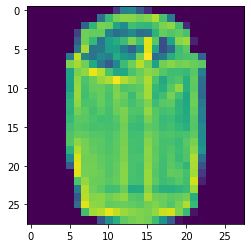

2245
2.2508109285025633
[0.06624767 0.0075593  0.11585772 0.3550999  0.14799729 0.00353432
 0.29222408 0.00430255 0.00397372 0.00320347]


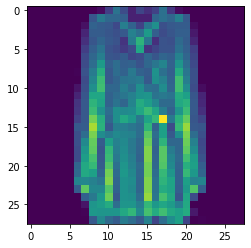

5148
2.213511329957016
[0.26786494 0.00202412 0.07706805 0.01775537 0.40375924 0.00120948
 0.05932883 0.00883272 0.1575011  0.00465618]


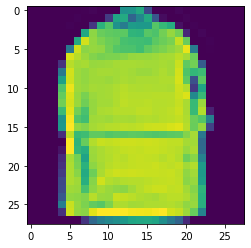

5470
2.174022292896831
[2.52877176e-03 1.02304126e-04 2.40625665e-01 2.13452056e-01
 8.45876634e-02 2.20851344e-03 3.66033942e-01 3.35519610e-04
 8.83955359e-02 1.73005858e-03]


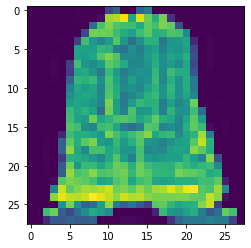

6474
2.159967674409476
[9.16781425e-02 1.71167485e-05 2.52680540e-01 1.03656344e-01
 2.03594193e-01 1.11186164e-05 3.47909927e-01 6.00983039e-05
 3.01484863e-04 9.10492308e-05]


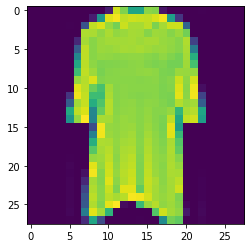

In [7]:
# compute predictions (i.e., probability distributions) on test data
Y_hat = model.predict(X_test)

import math
# define function to compute entropy
def entropy(p):
    return -sum([prob*(0.0 if prob == 0.0 else math.log2(prob)) for prob in p])

# compute entropy for each data point in the test data
entropies = np.apply_along_axis(entropy, 1, Y_hat)

# sort test data points in descending order of entropy
indices = list(range(0, len(Y_hat)))
indices.sort(key = lambda i : -entropies[i])

# load original MNIST data
(X_train_original, y_train_original), (X_test_original, y_test_original) = fashion_mnist.load_data()

# show top-10 confusing images
for i in range(0, 10):
    print(indices[i])
    print(entropies[indices[i]])
    print(Y_hat[indices[i]])
    plt.imshow(X_test_original[indices[i]])
    plt.show()

## 4.2 Using a CNN to Classify Images from 10 Classes
Another dataset included with Keras is CIFAR10, which consist of RGB images belonging to 10 different
classes. It is available in Keras via the function tf.keras.datasets.cifar10.load_data() We
want to adapt the CNN used to classify cats and dogs from Chapter 4.5 to tackle this task.

(a) Modify the code to use the CIFAR 10 dataset and determine the accuracy on the test data.

(b) Extend the code to make use of data augmentation and determine the accuracy on the test
data.

(c) Modify the code that uses the pre-trained VGG16 network to use the CIFAR 10 dataset and
determine the accuracy on the test data.

(d) Keras also includes other pre-trained networks. A list of them can be found at:
https://keras.io/api/applications/.
Pick one of the other available pre-trained networks and check whether using it yields an
improvement over the accuracy achieved in (b) and (c)

In [ ]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# paths where training, validation, and test images reside
train_dir='../data/cats_and_dogs_small/train'
validation_dir='../data/cats_and_dogs_small/validation'
test_dir='../data/cats_and_dogs_small/test'

# we use generators to iterate over the training and validation images
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size=(150, 150), 
                                                              batch_size=20, 
                                                              class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')

# define the architecture of our neural network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

# fit the model
history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30,
                              validation_data=validation_generator, 
                              validation_steps=50)

# save the model
model.save('cats_and_dogs_small_1.h5')

# compute loss and accuracy on test data
score = model.evaluate(test_generator)
print("Test score:", score[0])
print("Test accuracy:", score[1])